# MATH 210 Introduction to Mathematical Computing

**March 22, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Vandermonde Matrix

In [2]:
d = 4
x = np.linspace(0,d,d+1)
x

array([0., 1., 2., 3., 4.])

Construct the Vandermonde matrix in two different ways:

In [3]:
X = np.column_stack([x**n for n in range(d+1)])
X

array([[  1.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

In [4]:
X = np.vander(x,increasing=True)
X

array([[  1.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

Visualize the matrix:

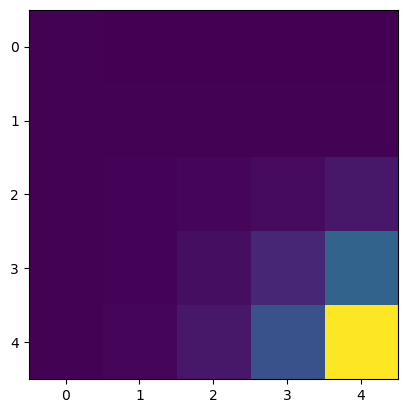

In [5]:
plt.imshow(X)
plt.show()

The determinant is nonzero if and only if all the $x$ values are different.

In [7]:
la.det(X)

288.00000000000034

## Polynomial Interpolation

Consider data points:

In [8]:
x = [-2.,-1.,0.,1.,2.]
y = [8.,7.,11.,19.,13.]

Find coefficients of interpolating polynomial:

In [9]:
X = np.vander(x,increasing=True)
c = la.solve(X,y)

In [10]:
c

array([11.        ,  7.58333333,  2.70833333, -1.58333333, -0.70833333])

In [11]:
X@c

array([ 8.,  7., 11., 19., 13.])

Plot the interpolating polynomial $p(x)$ with the data.

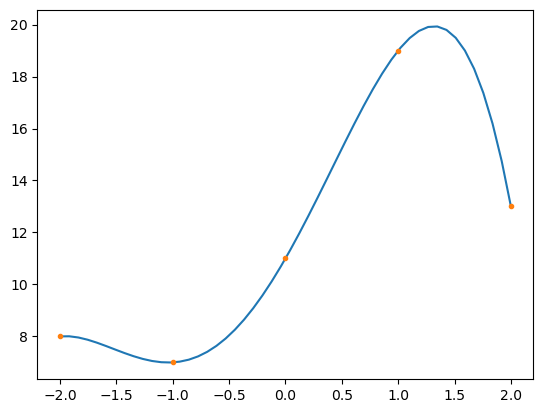

In [12]:
xs = np.linspace(-2,2,50)
# p = lambda x: c[0] + c[1]*x + c[2]*x**2 + c[3]*x**3 + c[4]*x**4
p = lambda x: sum([c[n]*x**n for n in range(len(c))])
ys = p(xs)
plt.plot(xs,ys)
plt.plot(x,y,'.')
plt.show()

The results get weird when we consider lots of points. This is because high degree polynomials oscillate wildly.

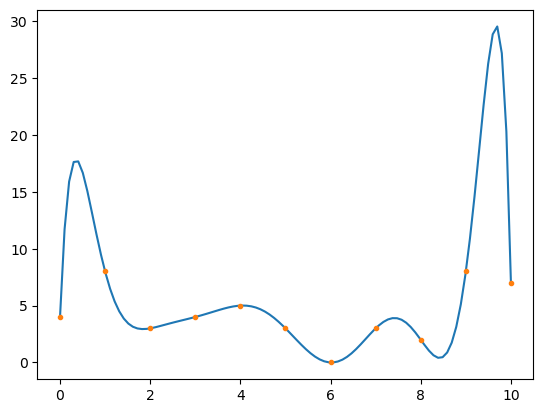

In [13]:
d = 10
x = np.arange(d+1)
y = np.random.randint(0,10,d+1)
X = np.vander(x,increasing=True)
c = la.solve(X,y)
xs = np.linspace(np.min(x),np.max(x),100)
p = lambda x: sum([c[n]*x**n for n in range(len(c))])
ys = p(xs)
plt.plot(xs,ys)
plt.plot(x,y,'.')
plt.show()